# 数据探索阶段，要求对数据的基本特征有一个全局的大致了解

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
                    

### 利用pandas导入训练数据集

In [55]:
df_train = pd.read_csv(r'F:\study\projects\kaggle\House Prices\data\train.csv')

In [56]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### 使用df_train.describe()对数据的基本情况进行快速了解

In [57]:
df_train.describe()
#df_train['SalePrice'].describe() 获得某一特定列的基本统计特征
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

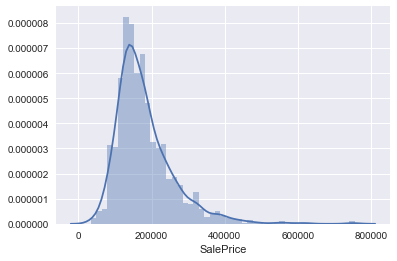

In [58]:
#histogram
sns.distplot(df_train['SalePrice'])

### 计算两个描述数据分布形态的统计量：偏度（skewness）、峰度（kurtosis）
#### 偏度描述了数据总体分布的对称性，=0表示其数据分布形态与正态分布的倾斜程度相同，>0为正偏（右  偏）， 小于0为负偏（左偏）
#### 峰度描述总体中所有取值分布形态的陡缓程度，大于0表示该数据总体分布与正态分布相比较为陡峭，为尖顶峰；小于0表示该数据总体分####布与正态分布相比较为平坦，为平顶峰                                                          

In [59]:
print('skewness:{0},kurtosis:{1}'.format(df_train['SalePrice'].skew(), df_train['SalePrice'].kurt()))

skewness:1.8828757597682129,kurtosis:6.536281860064529


#### 做出反应变量关系的散点图

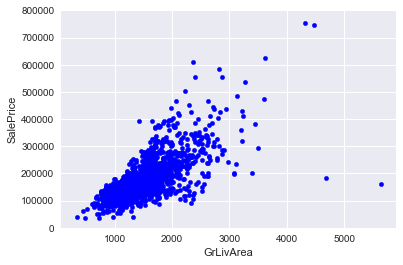

In [60]:
# 绘制GrLivArea / SalePrice 散点图
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', c='blue',ylim=(0,800000))

#### 可以看出GrLivArea与SalePrice可能呈线性关系

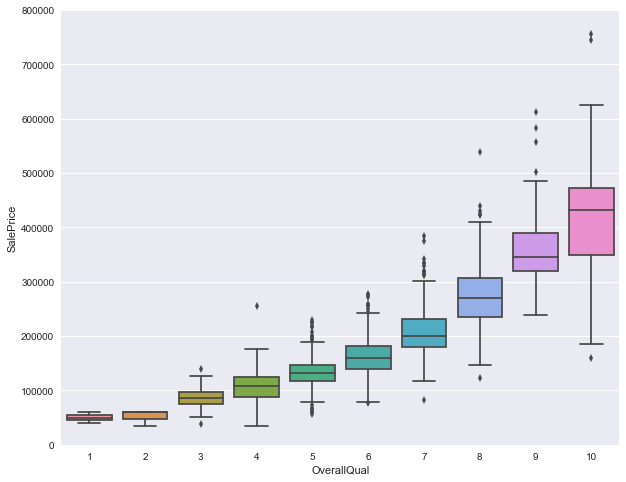

In [61]:
#box plot overallqual/saleprice
#使用箱形图可视化OverQual与SalePrice的关系
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

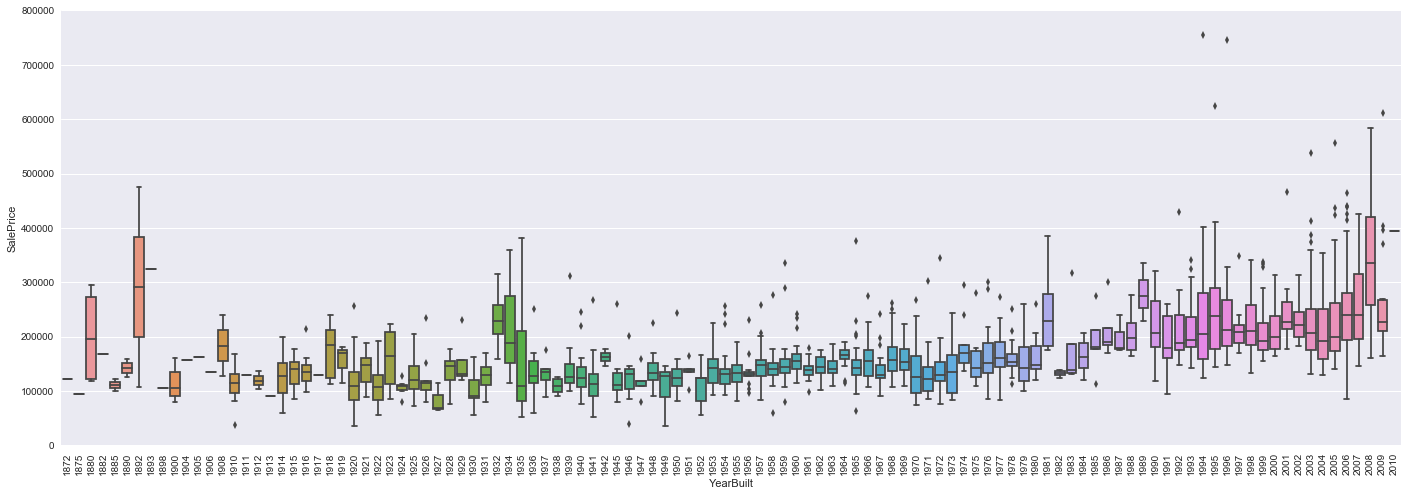

In [62]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(24, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

#### 相关矩阵（热点图）(通过 Correlation matrix 观察哪些变量会和预测目标关系比较大，哪些变量之间会有较强的关联)

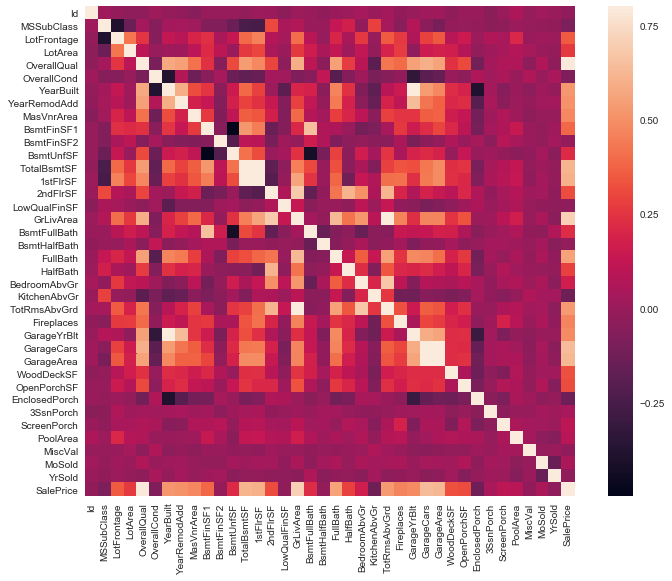

In [63]:
corrmat = df_train.corr()
f,ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True)

#### 可以看到“TotalBsmtSF"和"1stFlrSF"颜色几乎一样，说明二者关系较强，这个时候可以只取其中的一个特征。
#### 同时可以看到像"OverallQual"和"GrLiveArea"与SalePrice有很强的关联，对我们来说是特别要重视的特征

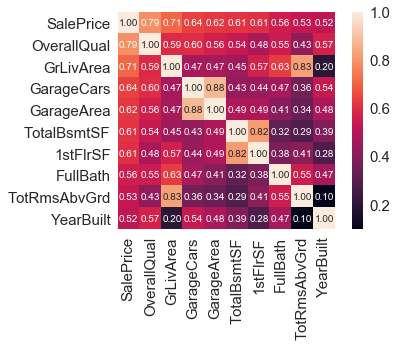

In [64]:
# 把与SalePrice最紧密关联的10个变量的关联度打印出来
# saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True,annot=True, square=True, fmt='.2f',annot_kws={'size':10}, yticklabels=cols.values,xticklabels=cols.values)
plt.show()


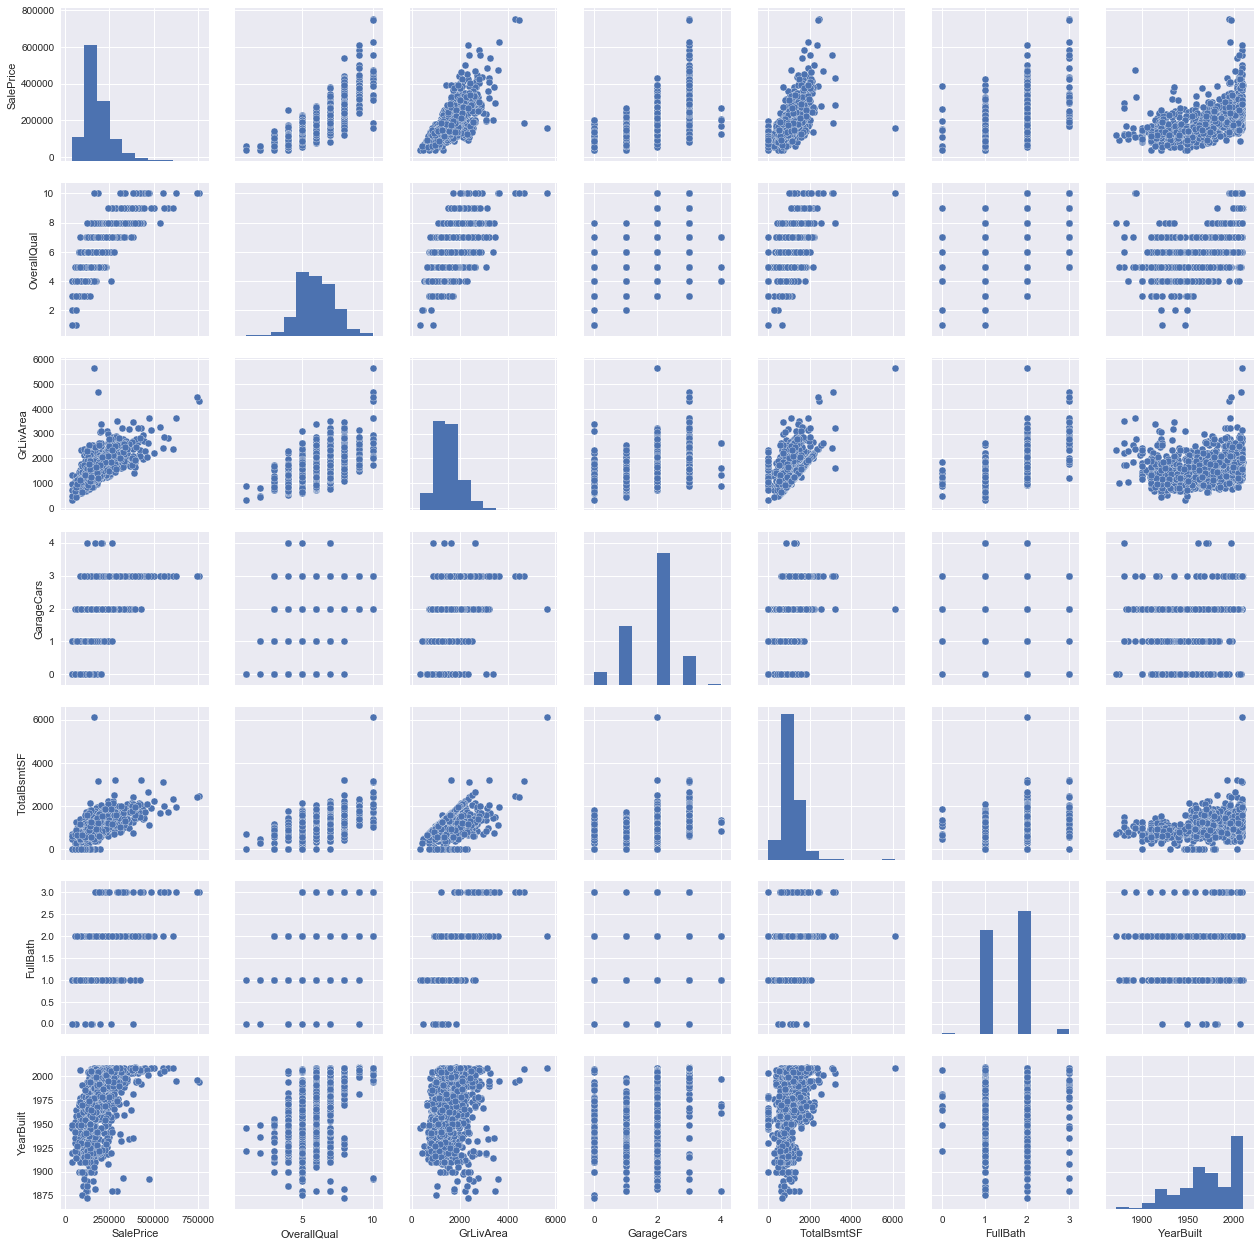

In [65]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show()

In [66]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


#### 从上面的缺失值的缺失统计可以看到，整个数据集中有19个特征存在不同程度的信息缺失：
* 如果某一特征的数据缺失量达到15%以上，可以认为这项特征是在数据集中不存在的，直接删除，因此像“PoolQC",...,"LotFrontage"这些特征直接从数据集中删除
* 观察到GarageX特征具有相同数量的缺失值，推测可能代表的是同一组观测值，通过前面的分析可以确定关于”Garage“的信息“GarageCars”已经很好的表征了，故删除这几个特征。对BsmtX同理
* 关于'MasVnrArea'和'MasVnrType'，我们可以认为这些变量不是必需的。 此外，它们与已经考虑的“YearBuilt”和“OverallQual”有很强的相关性。 因此，如果删除“MasVnrArea”和“MasVnrType”，我们不会丢失信息。
* 现在，只剩下“Electrical”这个特征，这个特征只有一个样本带有缺失值，因此直接删除这一个带有缺失值的样本而保留这个特征

#### 现在来删除特征“Electrical”中带有缺失值的这一个样本

In [68]:
#dealing with missing data
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max() #just checking that there's no missing data missing...

0

### 离群值
#### 离群值是我们应该注意的一个复杂问题，这里将通过“SalePrice”的标准偏差和一组散点图进行快速分析

单变量分析
-------------
一个主要问题就是确定一个阈值来定义什么是异常值，因此要标准化数据。  
数据标准化意味着将数据值转换为平均值为0，标准偏差为1

In [69]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[ 3.82758058]
 [ 4.0395221 ]
 [ 4.49473628]
 [ 4.70872962]
 [ 4.728631  ]
 [ 5.06034585]
 [ 5.42191907]
 [ 5.58987866]
 [ 7.10041987]
 [ 7.22629831]]


双变量分析
---------------
先观察房价（SalePrice）与地上总居住面积(GrLiveArea)的散点图

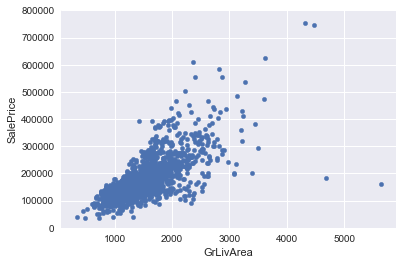

In [71]:
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

可以看到有两个很大的"GrLiveArea"的值对应着很低的房价，明显远离点集，判定为离群点将给予删除

In [73]:
# deleting points
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2] #找到这两个离群点

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,160000
523,524,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2007,New,Partial,184750


In [74]:
# 删除
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

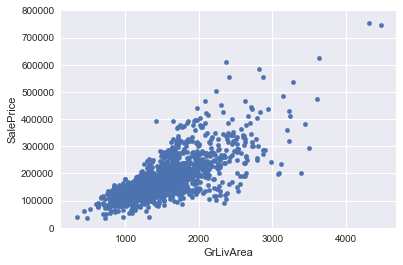

In [75]:
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

核心部分
===============
前面已经做了一些数据清洗和挖掘“SalePrice”相关的信息，现在需要深入探讨“SalePrice”是否符合统计假设，以让我们能够使用多元（变量）分析技术

根据[Hair et al.2013](https://www.amazon.com/Multivariate-Data-Analysis-Joseph-Hair/dp/0138132631)4种假设应当去测试：  
* **Normality:**  谈论Normality，就是指数据看起来像是符合正态分布。这很重要，因为有些统计假设模型就是依赖于正态分布。注意：单变量正态分布并不能确保多元正态性。

* **Homoscedasticity:** 同方差是指“假设：因变量在整个预测变量范围内表现出相同的方差水平”

* **Linearity:** 评估线性最常用的方法是检查散点图并搜索线性模式。如果模式不是线性的，那么探索数据转换是值得的。但是，我们不会涉及这个，因为我们所看到的大多数散点图似乎都有线性关系。

* **Absence of correlated errors:**  

#### 从normality角度分析数据  
* 直方图（Histogram）:峰度（Kurtosis）和偏度（skewness）
* 正态概率图（normal probability plot）:检查一份数据集数据分布是否符合正态分布，若该数据分布服从正态分布，正态概率图将是一条直线

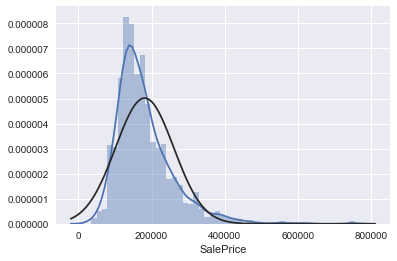

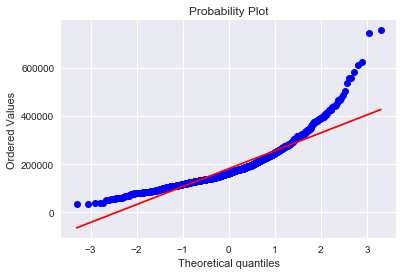

In [78]:
# histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit = norm)
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot = plt)

从上图可以看到“SalePrice”数据分布的直方图中有一条长尾巴拖在右边，与正态分布相比为“正偏”，且与正态分布相比更为陡峭是“尖顶峰”；从正态概率图中也可以看出“SalePrice”是**不符合正态分布的**。

#### 从统计学出发可以知道，对于数据分布的**正偏**问题，对数变换可以很好的缓解这种趋势

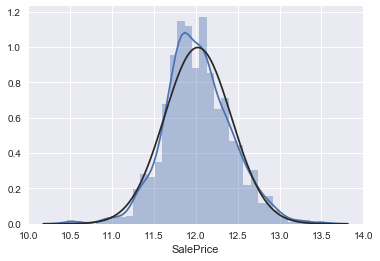

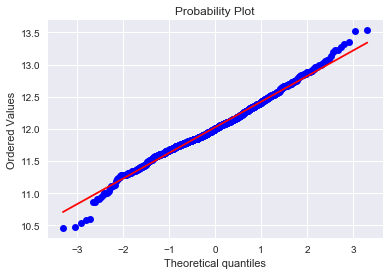

In [79]:
#applying log transformation
df_train['SalePrice'] = np.log(df_train['SalePrice'])

#transformed histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

经过对数变换后“SalePrice”的分布已经近似是正态分布了

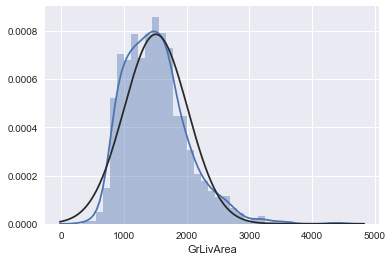

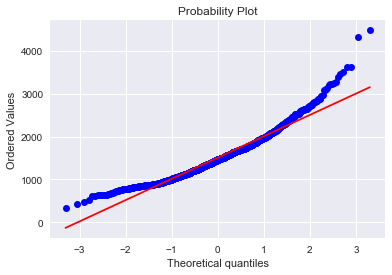

In [81]:
# GrLiveArea
#histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

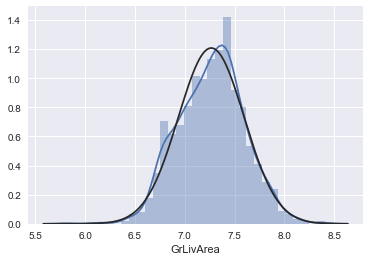

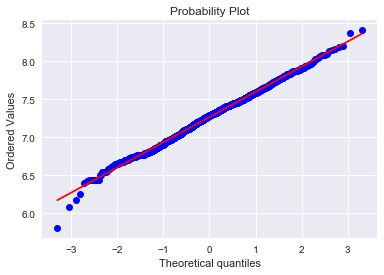

In [82]:
#data transformation
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])
#transformed histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

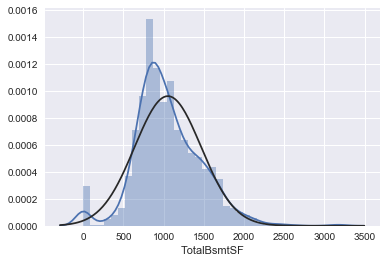

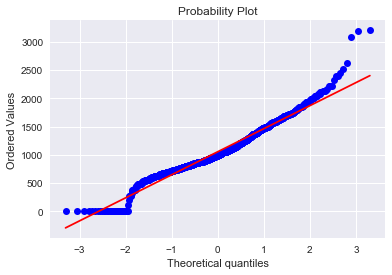

In [83]:
# TotalBsmtSF
#histogram and normal probability plot
sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

对于“TotalBsmSF”（地下室总面积）的直方图和正态概率图可以看到TotalBsmSF并不符合正态分布，且有大量的0值，不能使用对数变换来缓解。

为了使用对数变换，我们使用新的变量来表示有无地下室（basement）（二进制变量）。然后对所有非零数据值进行对数变换而忽略零值。这种方式可以让我们转换数据又不失去有没有地下室的影响。

In [86]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
df_train['HasBsmt'] = 0
df_train.loc[df_train['TotalBsmtSF']>0, 'HasBsmt'] = 1
# df_train.to_csv('2.csv') # 保存新的csv文件

In [89]:
#transform data
# 对TotalBsmtSF非零值进行对数变换
df_train.loc[df_train['HasBsmt']==1, 'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

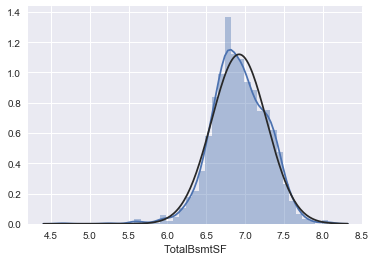

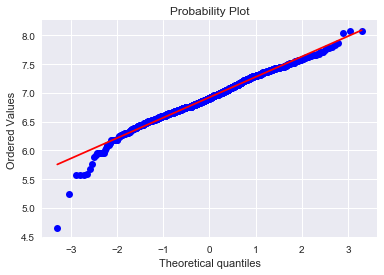

In [90]:
#histogram and normal probability plot
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

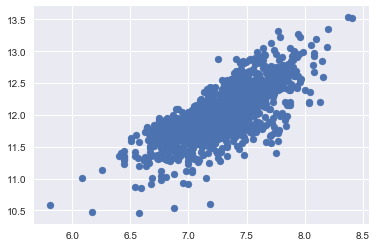

In [91]:
#### 考虑同方差性
plt.scatter(df_train['GrLivArea'], df_train['SalePrice']);

In [92]:
# 哑变量
#convert categorical variable into dummy
df_train = pd.get_dummies(df_train)